In [1]:
%config Completer.use_jedi = False

# Handling Missing Data with Imputation

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

Generating Time Series Data

In [25]:
file_orig = Path('../../datasets/Ch7/co2_original.csv')
file_missing = Path('../../datasets/Ch7/co2_missing_only.csv')

co2_org = pd.read_csv(file_orig, index_col='year', parse_dates=[0])
co2_missing = pd.read_csv(file_missing, index_col='year', parse_dates=[0])
co2_missing.columns = ['missing']

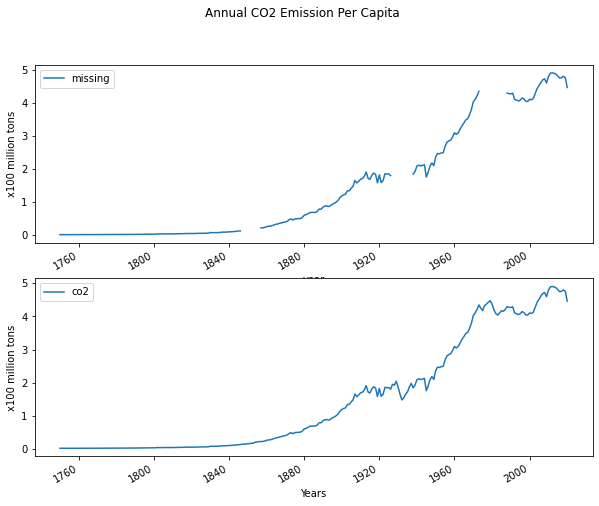

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Annual CO2 Emission Per Capita ')
co2_missing.plot(ax=ax1, figsize=(10,8))
ax1.set_ylabel('x100 million tons')
co2_org.plot(ax=ax2)
ax2.set_xlabel('Years')
ax2.set_ylabel('x100 million tons')
plt.show()

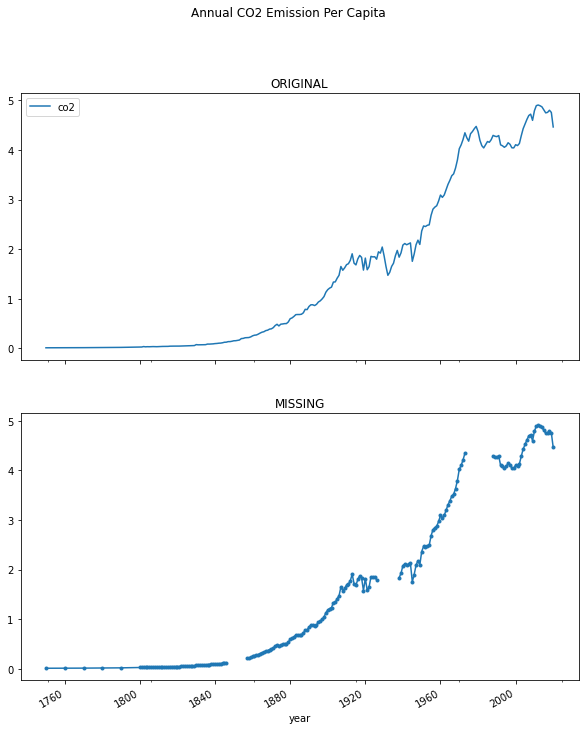

In [23]:
def plot_dfs(df1, df2):
    cols = df2.shape[1]
    fig, ax = plt.subplots(cols+1, 1, sharex=True)
    fig.suptitle('Annual CO2 Emission Per Capita ')
    df1.plot(ax=ax[0], figsize=(10, 12))  
    ax[0].set_title('ORIGINAL')
    for i, col in enumerate(df2.columns):
        df2[col].plot(ax=ax[i+1], style='.-')
        ax[i+1].set_title(col.upper())
      
    plt.show()
plot_dfs(co2_org, co2_missing)

In [178]:
co2_missing.isnull().sum()

missing    35
dtype: int64

In [179]:
# option 1 
co2_missing['ffil'] = co2_missing['missing'].fillna(method='ffill')
co2_missing['bfill'] = co2_missing['missing'].fillna(method='bfill')
co2_missing['mean'] = co2_missing['missing'].fillna(co2_missing['missing'].mean())


In [180]:
scores = []
for col in co2_missing.columns[1:]:
    rmse = np.sqrt(np.mean((co2_org['CO2'] - co2_missing[col])**2))
    scores.append(rmse)
    print(f'RMSE for {col}: {rmse}')

RMSE for ffil: 0.05873012599267133
RMSE for bfill: 0.05550012995280968
RMSE for mean: 0.7156383637041684


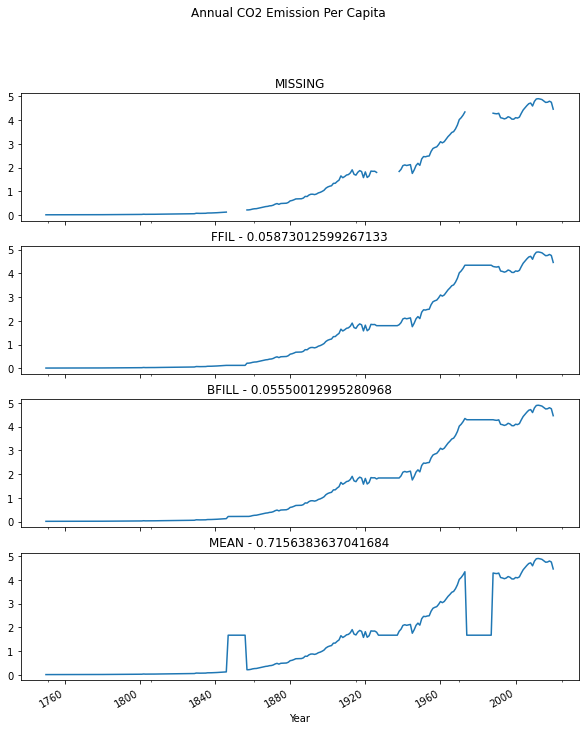

In [181]:
def plot_dfs(df, scores):
    cols = df.shape[1]
    fig, ax = plt.subplots(cols, 1, sharex=True)
    df['missing'].plot(ax=ax[0], figsize=(10, 12))
    ax[0].set_title('MISSING')
    fig.suptitle('Annual CO2 Emission Per Capita ')
    for i, col in enumerate(zip(df.columns[1:], scores)):
        df[col[0]].plot(ax=ax[i+1])
        ax[i+1].set_title(f'{col[0].upper()} - {col[1]}')
    
    plt.show()
plot_dfs(co2_missing, scores)

### Interopelation

In [182]:
file_orig = Path('../../datasets/Ch7/co2_original.csv')
file_missing = Path('../../datasets/Ch7/co2_missing.csv')

co2_org = pd.read_csv(file_orig, index_col='Year', parse_dates=[0])
co2_missing = pd.read_csv(file_missing, index_col='Year', parse_dates=[0])
co2_missing.columns = ['missing']

co2_missing['linear'] = co2_missing['missing'].interpolate(method='linear')
co2_missing['quadratic'] = co2_missing['missing'].interpolate(method='quadratic')
co2_missing['slinear'] = co2_missing['missing'].interpolate(method='slinear')
co2_missing['nearest'] = co2_missing['missing'].interpolate(method='nearest')
co2_missing['polynomial'] = co2_missing['missing'].interpolate(method='polynomial', order=2)

In [183]:
scores = []
for col in co2_missing.columns[1:]:
    rmse = np.sqrt(np.mean((co2_org['CO2'] - co2_missing[col])**2))
    scores.append(rmse)
    print(f'RMSE for {col}: {rmse}')

RMSE for linear: 0.05507291327761665
RMSE for quadratic: 0.08367561505614347
RMSE for slinear: 0.0550726615336139
RMSE for nearest: 0.05385422309469095
RMSE for polynomial: 0.08367561505614347


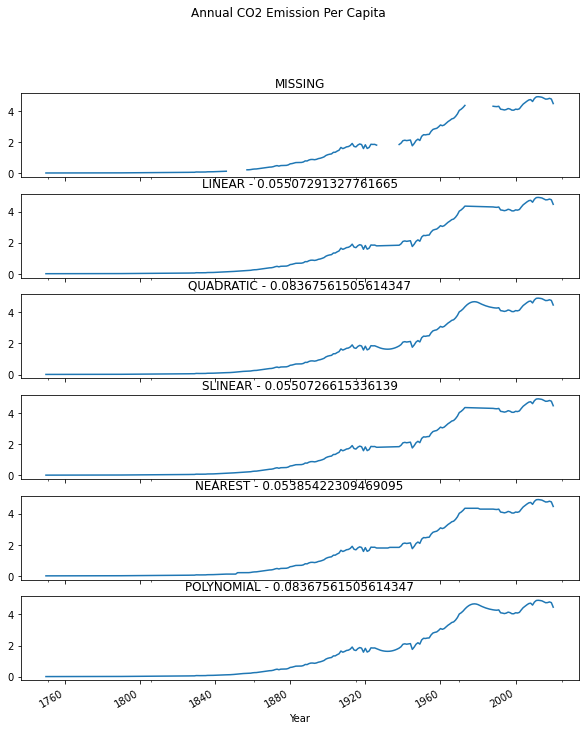

In [184]:
def plot_dfs(df, scores):
    cols = df.shape[1]
    fig, ax = plt.subplots(cols, 1, sharex=True)
    df['missing'].plot(ax=ax[0], figsize=(10, 12))
    ax[0].set_title('MISSING')
    fig.suptitle('Annual CO2 Emission Per Capita ')
    for i, col in enumerate(zip(df.columns[1:], scores)):
        df[col[0]].plot(ax=ax[i+1])
        ax[i+1].set_title(f'{col[0].upper()} - {col[1]}')
    
    plt.show()
plot_dfs(co2_missing, scores)

### Using Scikit-Learn

In [185]:
file_orig = Path('../../datasets/Ch7/co2_original.csv')
file_missing = Path('../../datasets/Ch7/co2_missing.csv')

co2_org = pd.read_csv(file_orig, index_col='Year', parse_dates=[0])
co2_missing = pd.read_csv(file_missing, index_col='Year', parse_dates=[0])
co2_missing.columns = ['missing']

In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

co2_missing['SimpleImputer'] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(co2_missing)
co2_missing['ExtraTreesRegressor'] = IterativeImputer(ExtraTreesRegressor()).fit_transform(co2_missing[['missing']])
co2_missing['BaggingRegressor'] = IterativeImputer(BaggingRegressor()).fit_transform(co2_missing[['missing']])
co2_missing['ElasticNet'] = IterativeImputer(ElasticNet()).fit_transform(co2_missing[['missing']])
co2_missing['LinearRegression'] = IterativeImputer(LinearRegression()).fit_transform(co2_missing[['missing']])
co2_missing['KNeighborsRegressor'] = IterativeImputer(KNeighborsRegressor(n_neighbors=5)).fit_transform(co2_missing[['missing']])
co2_missing['KNNImputer'] = KNNImputer(missing_values=np.nan, n_neighbors=5).fit_transform(co2_missing[['missing']])

In [187]:
scores = []
for col in co2_missing.columns[1:]:
    rmse = np.sqrt(np.mean((co2_org['CO2'] - co2_missing[col])**2))
    scores.append(rmse)
    print(f'RMSE for {col}: {rmse}')

RMSE for SimpleImputer: 0.7156383637041684
RMSE for ExtraTreesRegressor: 0.7156383637041684
RMSE for BaggingRegressor: 0.7156383637041684
RMSE for ElasticNet: 0.7156383637041684
RMSE for LinearRegression: 0.7156383637041684
RMSE for KNeighborsRegressor: 0.7156383637041684
RMSE for KNNImputer: 0.7156383637041684


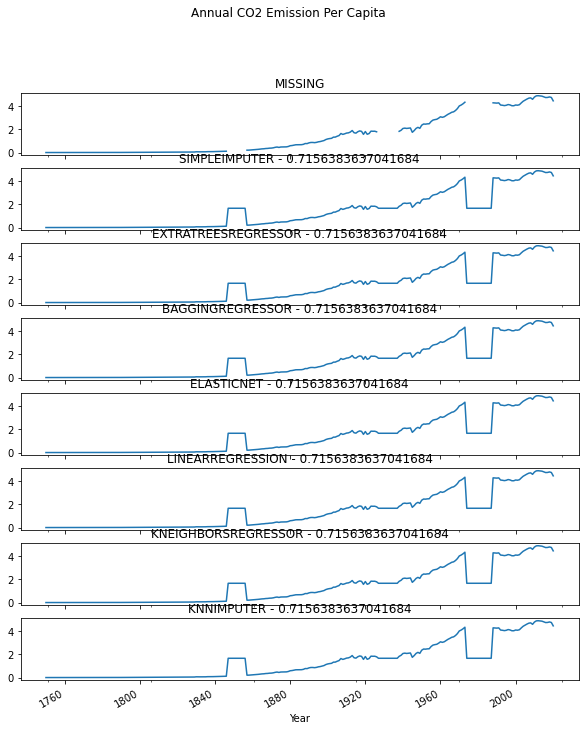

In [188]:
plot_dfs(co2_missing, scores)

# Ecommerce Data Set

In [6]:
import pandas as pd
import numpy as np
from pathlib import Path

In [17]:
file = Path('../../datasets/Ch7/e-shop clothing 2008.csv')
df = pd.read_csv(file, delimiter=';')

In [18]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df[df['country'] == 29]

<AxesSubplot:xlabel='date'>

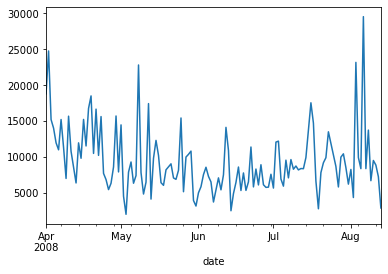

In [9]:
df.groupby('date')['order'].sum().plot()

In [10]:
df_orig = df.groupby('date')['order'].sum()
df_orig

date
2008-04-01    18784
2008-04-02    24738
2008-04-03    15209
2008-04-04    14018
2008-04-05    11974
              ...  
2008-08-09     6716
2008-08-10     9523
2008-08-11     8881
2008-08-12     7272
2008-08-13     2922
Name: order, Length: 135, dtype: int64

In [16]:
df_orig

date
2008-04-01    18784
2008-04-02    24738
2008-04-03    15209
2008-04-04    14018
2008-04-05    11974
              ...  
2008-08-09     6716
2008-08-10     9523
2008-08-11     8881
2008-08-12     7272
2008-08-13     2922
Name: order, Length: 135, dtype: int64

<AxesSubplot:xlabel='date'>

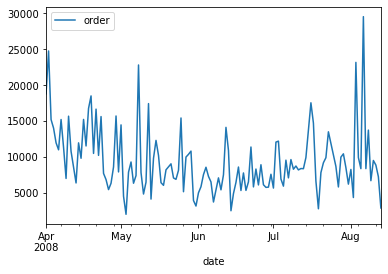

In [155]:
df_orig = df_orig.to_frame()
df_orig.plot()

In [11]:
file = Path('../../datasets/Ch7/clicks_poland.csv')
df_missing = pd.read_csv(file, index_col='date',parse_dates=True)

In [12]:
df_missing.isna().sum()

order    17
dtype: int64

In [13]:
df_missing.isna().index

DatetimeIndex(['2008-04-01', '2008-04-02', '2008-04-03', '2008-04-04',
               '2008-04-05', '2008-04-06', '2008-04-07', '2008-04-08',
               '2008-04-09', '2008-04-10',
               ...
               '2008-08-04', '2008-08-05', '2008-08-06', '2008-08-07',
               '2008-08-08', '2008-08-09', '2008-08-10', '2008-08-11',
               '2008-08-12', '2008-08-13'],
              dtype='datetime64[ns]', name='date', length=135, freq=None)

<AxesSubplot:xlabel='date'>

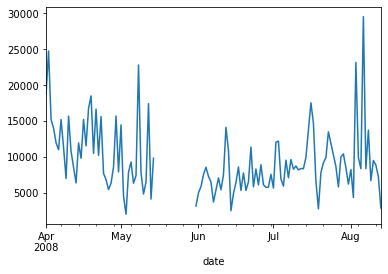

In [348]:
df_missing['order'].plot()

In [14]:
file = Path('../../datasets/Ch7/clicks_multi.csv')
df_missing = pd.read_csv(file, index_col='date',parse_dates=True)

In [15]:
df_missing

,price,location,order
date,,,
2008-04-01,43.155647,2,18784.0
2008-04-02,43.079056,1,24738.0
2008-04-03,43.842609,2,15209.0
2008-04-04,43.312376,1,14018.0
2008-04-05,43.941176,1,11974.0
...,...,...,...
2008-08-09,44.182033,1,6716.0
2008-08-10,43.608260,1,9523.0
2008-08-11,43.553363,1,8881.0


In [370]:
# option 1 
df_missing['ffil'] = df_missing['order'].fillna(method='ffill')
df_missing['bfill'] = df_missing['order'].fillna(method='bfill')
df_missing['mean'] = df_missing['order'].fillna(df_missing['order'].mean())

scores = []
for col in df_missing.columns[3:]:
    rmse = np.sqrt(np.mean((df_orig['order'] - df_missing[col])**2))
    scores.append(rmse)
    print(f'RMSE for {col}: {rmse}')

RMSE for ffil: 1034.1210689204554
RMSE for bfill: 2116.6840489225033
RMSE for mean: 997.7600138929953


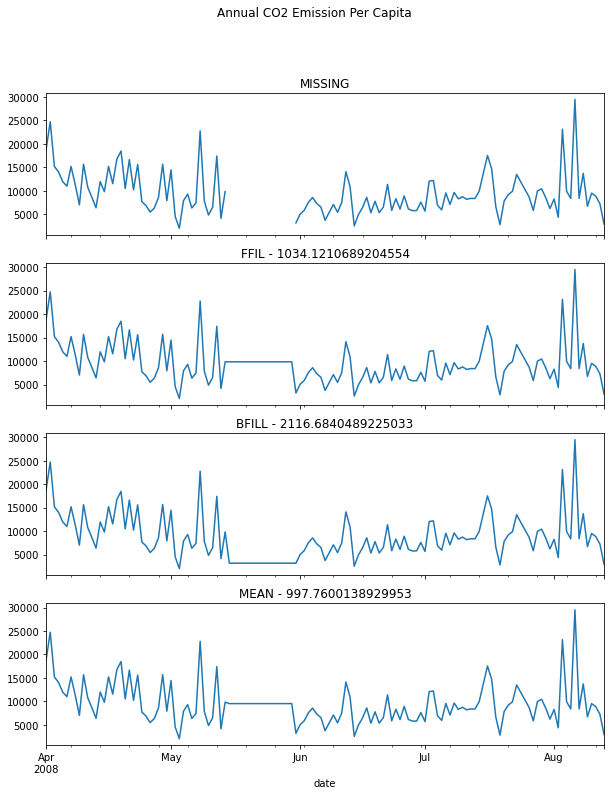

In [371]:
plot_dfs(df_missing.iloc[:,2:], scores)

In [372]:
file = Path('../../datasets/Ch7/clicks_poland_full.csv')
df_missing = pd.read_csv(file, index_col='date',parse_dates=True)

In [373]:
df_missing['linear'] = df_missing['order'].interpolate(method='linear')
df_missing['quadratic'] = df_missing['order'].interpolate(method='quadratic')
df_missing['slinear'] = df_missing['order'].interpolate(method='slinear')
df_missing['nearest'] = df_missing['order'].interpolate(method='nearest')
df_missing['polynomial'] = df_missing['order'].interpolate(method='polynomial', order=2)

In [374]:
scores = []
for col in df_missing.columns[3:]:
    rmse = np.sqrt(np.mean((df_orig['order'] - df_missing[col])**2))
    scores.append(rmse)
    print(f'RMSE for {col}: {rmse}')

RMSE for linear: 1329.1448378562811
RMSE for quadratic: 5224.641260626975
RMSE for slinear: 1329.1448378562811
RMSE for nearest: 1706.1853705030173
RMSE for polynomial: 5224.641260626975


In [375]:
df_missing.iloc[:,2:]

,order,linear,quadratic,slinear,nearest,polynomial
date,,,,,,
2008-04-01,18784.0,18784.0,18784.0,18784.0,18784.0,18784.0
2008-04-02,24738.0,24738.0,24738.0,24738.0,24738.0,24738.0
2008-04-03,15209.0,15209.0,15209.0,15209.0,15209.0,15209.0
2008-04-04,14018.0,14018.0,14018.0,14018.0,14018.0,14018.0
2008-04-05,11974.0,11974.0,11974.0,11974.0,11974.0,11974.0
...,...,...,...,...,...,...
2008-08-09,6716.0,6716.0,6716.0,6716.0,6716.0,6716.0
2008-08-10,9523.0,9523.0,9523.0,9523.0,9523.0,9523.0
2008-08-11,8881.0,8881.0,8881.0,8881.0,8881.0,8881.0


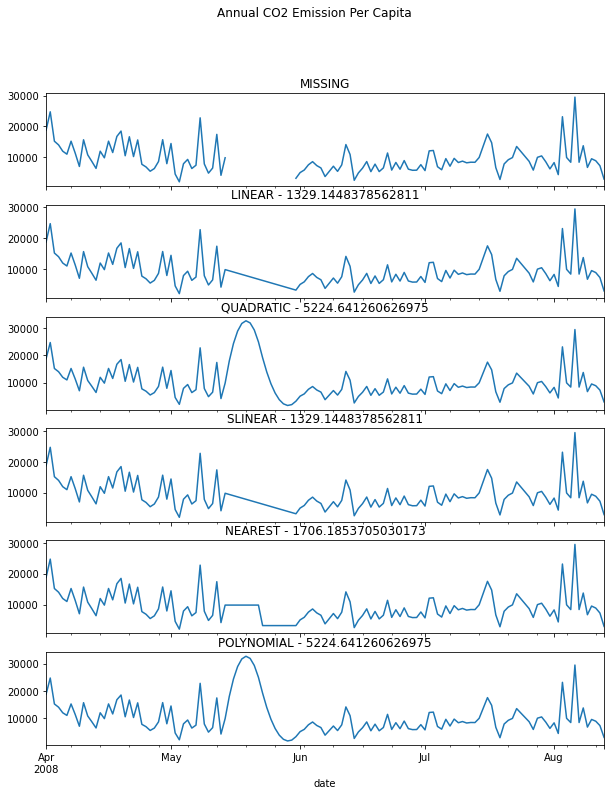

In [376]:
def plot_dfs(df, scores):
    cols = df.shape[1]
    fig, ax = plt.subplots(cols, 1, sharex=True)
    df['order'].plot(ax=ax[0], figsize=(10, 12))
    ax[0].set_title('MISSING')
    fig.suptitle('Annual CO2 Emission Per Capita ')
    for i, col in enumerate(zip(df.columns[1:], scores)):
        df[col[0]].plot(ax=ax[i+1])
        ax[i+1].set_title(f'{col[0].upper()} - {col[1]}')
    
    plt.show()
plot_dfs(df_missing.iloc[:,2:], scores)

<AxesSubplot:xlabel='date'>

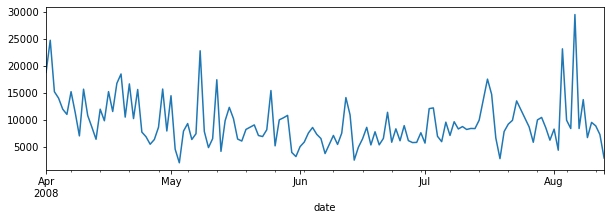

In [378]:
df_orig['order'].plot(figsize=(10, 3))

In [380]:
file = Path('../../datasets/Ch7/clicks_poland_full.csv')
df_missing = pd.read_csv(file, index_col='date',parse_dates=True)

In [381]:
df_missing

,price,location,order
date,,,
2008-04-01,43.155647,2,18784.0
2008-04-02,43.079056,1,24738.0
2008-04-03,43.842609,2,15209.0
2008-04-04,43.312376,1,14018.0
2008-04-05,43.941176,1,11974.0
...,...,...,...
2008-08-09,44.182033,1,6716.0
2008-08-10,43.608260,1,9523.0
2008-08-11,43.553363,1,8881.0


In [383]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

df_missing['SimpleImputer'] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df_missing['order'].values.reshape(-1,1))
df_missing['ExtraTreesRegressor'] = IterativeImputer(ExtraTreesRegressor()).fit_transform(df_missing[['order']].values.reshape(-1,1))
df_missing['BaggingRegressor'] = IterativeImputer(BaggingRegressor()).fit_transform(df_missing[['order']].values.reshape(-1,1))
df_missing['ElasticNet'] = IterativeImputer(ElasticNet()).fit_transform(df_missing[['order']].values.reshape(-1,1))
df_missing['LinearRegression'] = IterativeImputer(LinearRegression()).fit_transform(df_missing[['order']].values.reshape(-1,1))
df_missing['KNeighborsRegressor'] = IterativeImputer(KNeighborsRegressor(n_neighbors=5)).fit_transform(df_missing[['order']].values.reshape(-1,1))
df_missing['KNNImputer'] = KNNImputer(missing_values=np.nan, n_neighbors=5).fit_transform(df_missing[['order']].values.reshape(-1,1))



In [384]:
scores = []
for col in df_missing.columns[3:]:
    rmse = np.sqrt(np.mean((df_orig['order'] - df_missing[col])**2))
    scores.append(rmse)
    print(f'RMSE for {col}: {rmse}')

RMSE for SimpleImputer: 997.7600138929953
RMSE for ExtraTreesRegressor: 997.7600138929953
RMSE for BaggingRegressor: 997.7600138929953
RMSE for ElasticNet: 997.7600138929953
RMSE for LinearRegression: 997.7600138929953
RMSE for KNeighborsRegressor: 997.7600138929953
RMSE for KNNImputer: 997.7600138929953


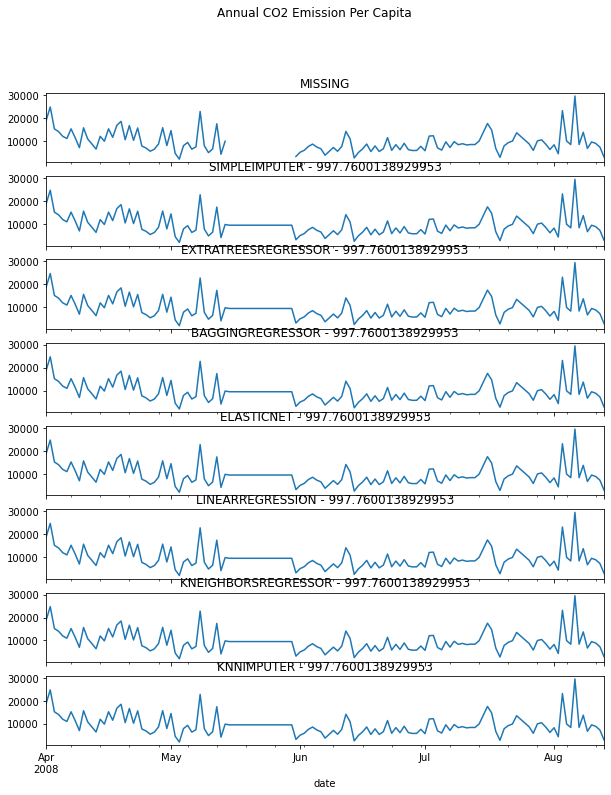

In [385]:
plot_dfs(df_missing.iloc[:,2:], scores)

In [19]:
df_orig = df.groupby('date').agg({'price': 'mean', 'location': lambda x:x.value_counts().index[0], 'order':'sum'})
df_orig


,price,location,order
date,,,
2008-04-01,43.155647,2,18784
2008-04-02,43.079056,1,24738
2008-04-03,43.842609,2,15209
2008-04-04,43.312376,1,14018
2008-04-05,43.941176,1,11974
...,...,...,...
2008-08-09,44.182033,1,6716
2008-08-10,43.608260,1,9523
2008-08-11,43.553363,1,8881


In [20]:
df_orig.to_csv('../../datasets/Ch7/click_multi_orig.csv')

In [295]:
# df_orig = df[['date',
#               'order',
#               'page 1 (main category)', 
#               'page 2 (clothing model)', 
#               'colour',
#               'price']]

In [265]:
#df_missing = df_missing[['order', 'page 1 (main category)', 'colour', 'price']]

In [304]:
#df_orig.to_csv('../../datasets/Ch7/clicks_poland_full.csv')

In [441]:
file = Path('../../datasets/Ch7/clicks_poland_full.csv')
df_missing = pd.read_csv(file, index_col='date',parse_dates=True)

In [444]:
df_missing.isna().sum()

price        0
location     0
order       16
dtype: int64

<AxesSubplot:xlabel='date'>

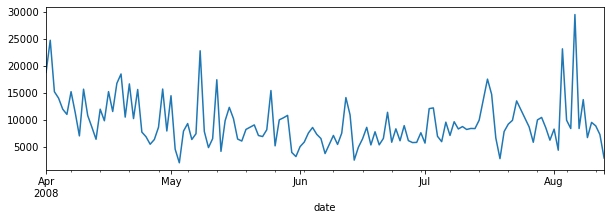

In [442]:
df_orig['order'].plot(figsize=(10, 3))

<AxesSubplot:xlabel='date'>

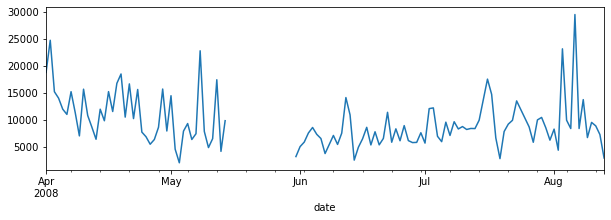

In [443]:
df_missing['order'].plot(figsize=(10, 3))

In [334]:
# df_missing['linear'] = df_missing.interpolate(method='linear')
# df_missing['quadratic'] = df_missing.interpolate(method='quadratic')
# df_missing['slinear'] = df_missing.interpolate(method='slinear')
# df_missing['nearest'] = df_missing.interpolate(method='nearest')
# df_missing['polynomial'] = df_missing.interpolate(method='polynomial', order=2)

In [ ]:
scores = []
for col in df_missing.columns[1:]:
    rmse = np.sqrt(np.mean((df_orig['order'] - df_missing[col])**2))
    scores.append(rmse)
    print(f'RMSE for {col}: {rmse}')

In [336]:
df_missing = pd.read_csv(file, index_col='date',parse_dates=True)

In [434]:
df_missing.isna().sum()

price                   0
location                0
order                  16
ExtraTreesRegressor     0
dtype: int64

In [28]:
df_missing['ExtraTreesRegressor'] = IterativeImputer(ExtraTreesRegressor()).fit_transform(df_missing.values)[ : , 2]
df_missing['BaggingRegressor'] = IterativeImputer(BaggingRegressor()).fit_transform(df_missing.values)[ : , 2]
df_missing['ElasticNet'] = IterativeImputer(ElasticNet()).fit_transform(df_missing.values)[ : , 2]
df_missing['LinearRegression'] = IterativeImputer(LinearRegression()).fit_transform(df_missing.values)[ : , 2]
df_missing['KNeighborsRegressor'] = IterativeImputer(KNeighborsRegressor(n_neighbors=5)).fit_transform(df_missing.values)[ : , 2]

                                                                       
                                                                         

/Users/tarekatwan/opt/anaconda3/envs/ch2/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/tarekatwan/opt/anaconda3/envs/ch2/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/tarekatwan/opt/anaconda3/envs/ch2/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.714e+01, tolerance: 4.961e-03
  model = cd_fast.enet_coordinate_descent(
/Users/tarekatwan/opt/anaconda3/envs/ch2/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the

In [446]:
df_missing

,price,location,order,ExtraTreesRegressor,BaggingRegressor,ElasticNet,LinearRegression,KNeighborsRegressor
date,,,,,,,,
2008-04-01,43.155647,2,18784.0,18784.0,18784.0,18784.0,18784.0,18784.0
2008-04-02,43.079056,1,24738.0,24738.0,24738.0,24738.0,24738.0,24738.0
2008-04-03,43.842609,2,15209.0,15209.0,15209.0,15209.0,15209.0,15209.0
2008-04-04,43.312376,1,14018.0,14018.0,14018.0,14018.0,14018.0,14018.0
2008-04-05,43.941176,1,11974.0,11974.0,11974.0,11974.0,11974.0,11974.0
...,...,...,...,...,...,...,...,...
2008-08-09,44.182033,1,6716.0,6716.0,6716.0,6716.0,6716.0,6716.0
2008-08-10,43.608260,1,9523.0,9523.0,9523.0,9523.0,9523.0,9523.0
2008-08-11,43.553363,1,8881.0,8881.0,8881.0,8881.0,8881.0,8881.0


In [440]:
# #df_missing['SimpleImputer'] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df_missing['order'].values.reshape([-1,1]))
# df_missing['ExtraTreesRegressor'] = IterativeImputer(ExtraTreesRegressor()).fit_transform(df_missing.values)
# df_missing['BaggingRegressor'] = IterativeImputer(BaggingRegressor()).fit_transform(df_missing.values)
# df_missing['ElasticNet'] = IterativeImputer(ElasticNet()).fit_transform(df_missing.values)
# df_missing['LinearRegression'] = IterativeImputer(LinearRegression()).fit_transform(df_missing.values)
# df_missing['KNeighborsRegressor'] = IterativeImputer(KNeighborsRegressor(n_neighbors=5)).fit_transform(df_missing.values)
# #df_missing['KNNImputer'] = KNNImputer(missing_values=np.nan, n_neighbors=5).fit_transform(df_missing['order'].values.reshape([-1,1]))




In [30]:
df_missing.isna().sum()

price                   0
location                0
order                  16
ExtraTreesRegressor     0
BaggingRegressor        0
ElasticNet              0
LinearRegression        0
KNeighborsRegressor     0
dtype: int64

In [447]:
df_missing.columns[3:]

Index(['ExtraTreesRegressor', 'BaggingRegressor', 'ElasticNet',
       'LinearRegression', 'KNeighborsRegressor'],
      dtype='object')

In [29]:
scores = []
for col in df_missing.columns[3:]:
    rmse = np.sqrt(np.mean((df_orig['order'] - df_missing[col])**2))
    scores.append(rmse)
    print(f'RMSE for {col}: {rmse}')

RMSE for ExtraTreesRegressor: 1411.053967149431
RMSE for BaggingRegressor: 1452.3110178327913
RMSE for ElasticNet: 1411.0539490781491
RMSE for LinearRegression: 1424.444572780455
RMSE for KNeighborsRegressor: 1422.7498757297042


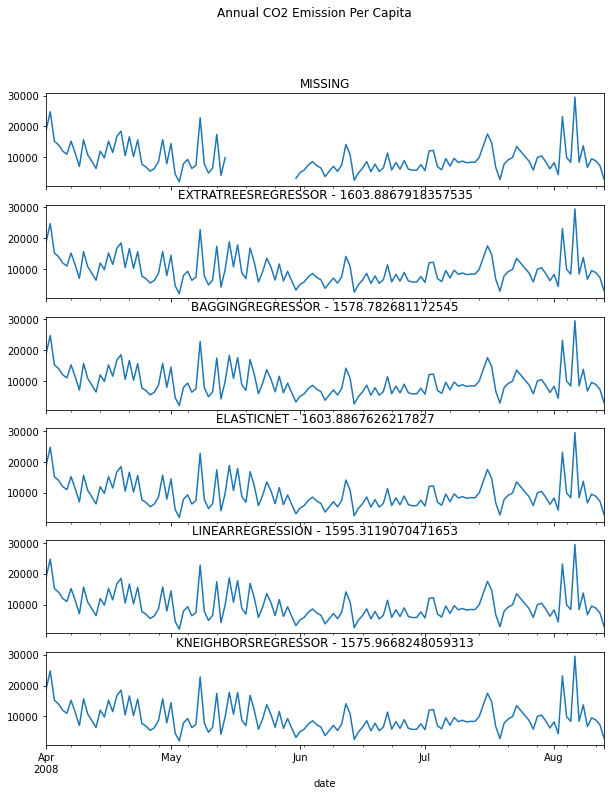

In [449]:
plot_dfs(df_missing.iloc[:,2:], scores)

In [455]:
df_missing

,price,location,order
date,,,
2008-04-01,43.155647,2,18784.0
2008-04-02,43.079056,1,24738.0
2008-04-03,43.842609,2,15209.0
2008-04-04,43.312376,1,14018.0
2008-04-05,43.941176,1,11974.0
...,...,...,...
2008-08-09,44.182033,1,6716.0
2008-08-10,43.608260,1,9523.0
2008-08-11,43.553363,1,8881.0


In [452]:
file = Path('../../datasets/Ch7/clicks_poland_full.csv')
df_missing = pd.read_csv(file, index_col='date',parse_dates=True)

In [ ]:
>>> imp = mice.MICEData(data)
>>> fml = 'y ~ x1 + x2 + x3 + x4'
>>> mice = mice.MICE(fml, sm.OLS, imp)
>>> results = mice.fit(10, 10)
>>> print(results.summary())

In [56]:
from statsmodels.imputation.mice import MICE, MICEData, MICEResults
import statsmodels.api as sm

In [57]:
md = MICEData(df_missing, perturbation_method='gaussian', k_pmm=20)

In [58]:
md.set_imputer('order')

In [59]:
md.update_all()

In [60]:
dd =md.data

In [61]:
(df_orig['order'] - dd['order']).isna().sum()


270

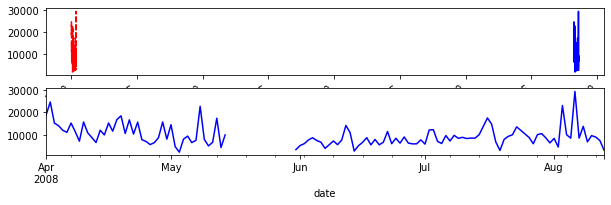

In [62]:
fig, axs = plt.subplots(2, 1)

dd['order'].plot(figsize=(10, 3), ax=axs[0], style='--', color='red')
df_orig['order'].plot(figsize=(10, 3), ax=axs[0], color='blue')
df_missing['order'].plot(figsize=(10, 3), ax=axs[1], color='blue')

plt.show()


In [53]:
md = MICEData(df_missing, perturbation_method='boot')
md.set_imputer('order')
md.update_all()

In [54]:
dd = md.data
dd.index = df_orig.index
np.sqrt(np.mean((df_orig['order'] - dd['order'])**2))

1497.8875619178325

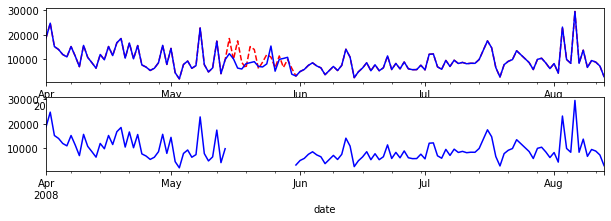

In [55]:
fig, axs = plt.subplots(2, 1)

dd['order'].plot(figsize=(10, 3), ax=axs[0], style='--', color='red')
df_orig['order'].plot(figsize=(10, 3), ax=axs[0], color='blue')
df_missing['order'].plot(figsize=(10, 3), ax=axs[1], color='blue')

plt.show()

<AxesSubplot:xlabel='date'>

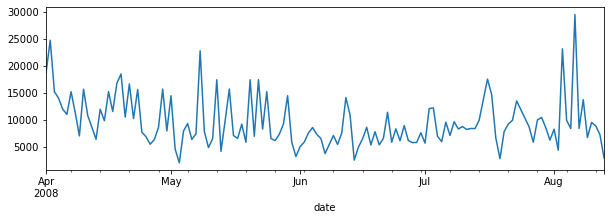

In [621]:
dd['order'].plot(figsize=(10, 3))

In [469]:
fml = 'order ~ price + location'
mice = MICE(fml, sm.OLS, md)

In [470]:
results = mice.fit()

In [471]:
results.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: MICE
============================================================================
Method:                     MICE         Sample size:            135        
Model:                      OLS          Scale                   21241941.06
Dependent variable:         order        Num. imputations        10         
----------------------------------------------------------------------------
            Coef.     Std.Err.     t    P>|t|    [0.025      0.975]    FMI  
----------------------------------------------------------------------------
Intercept 51683.5728 30541.5379  1.6922 0.0906 -8176.7415 111543.8871 0.1320
price      -947.6393   702.8091 -1.3484 0.1775 -2325.1199    429.8412 0.1331
location   -573.3182   384.6139 -1.4906 0.1361 -1327.1476    180.5112 0.1377
============================================================================

"""

In [ ]:
results.

In [464]:
>>> imp = mice.MICEData(data)
>>> fml = 'y ~ x1 + x2 + x3 + x4'
>>> mice = mice.MICE(fml, sm.OLS, imp)
>>> results = []
>>> for k in range(10):
>>>     x = mice.next_sample()
>>>     results.append(x)

In [465]:
results = []
for k in range(10):
    x = mice.next_sample()
    results.append(x)

In [466]:
results